## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
test.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [6]:
# id 열 삭제
train = train.drop(['id'], axis = 1)

In [7]:
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
# 결측치 확인
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# 데이터 타입 확인
train.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [11]:
# gender, vehicle_age, vehicle_damage 데이터 타입 변경
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year' : 1, '> 2 Years' : 2, '< 1 Year' : 0})
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

In [12]:
train.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [13]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,1,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,1,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,1,36,1,15.0,1,1,0,31951.0,152.0,294,0


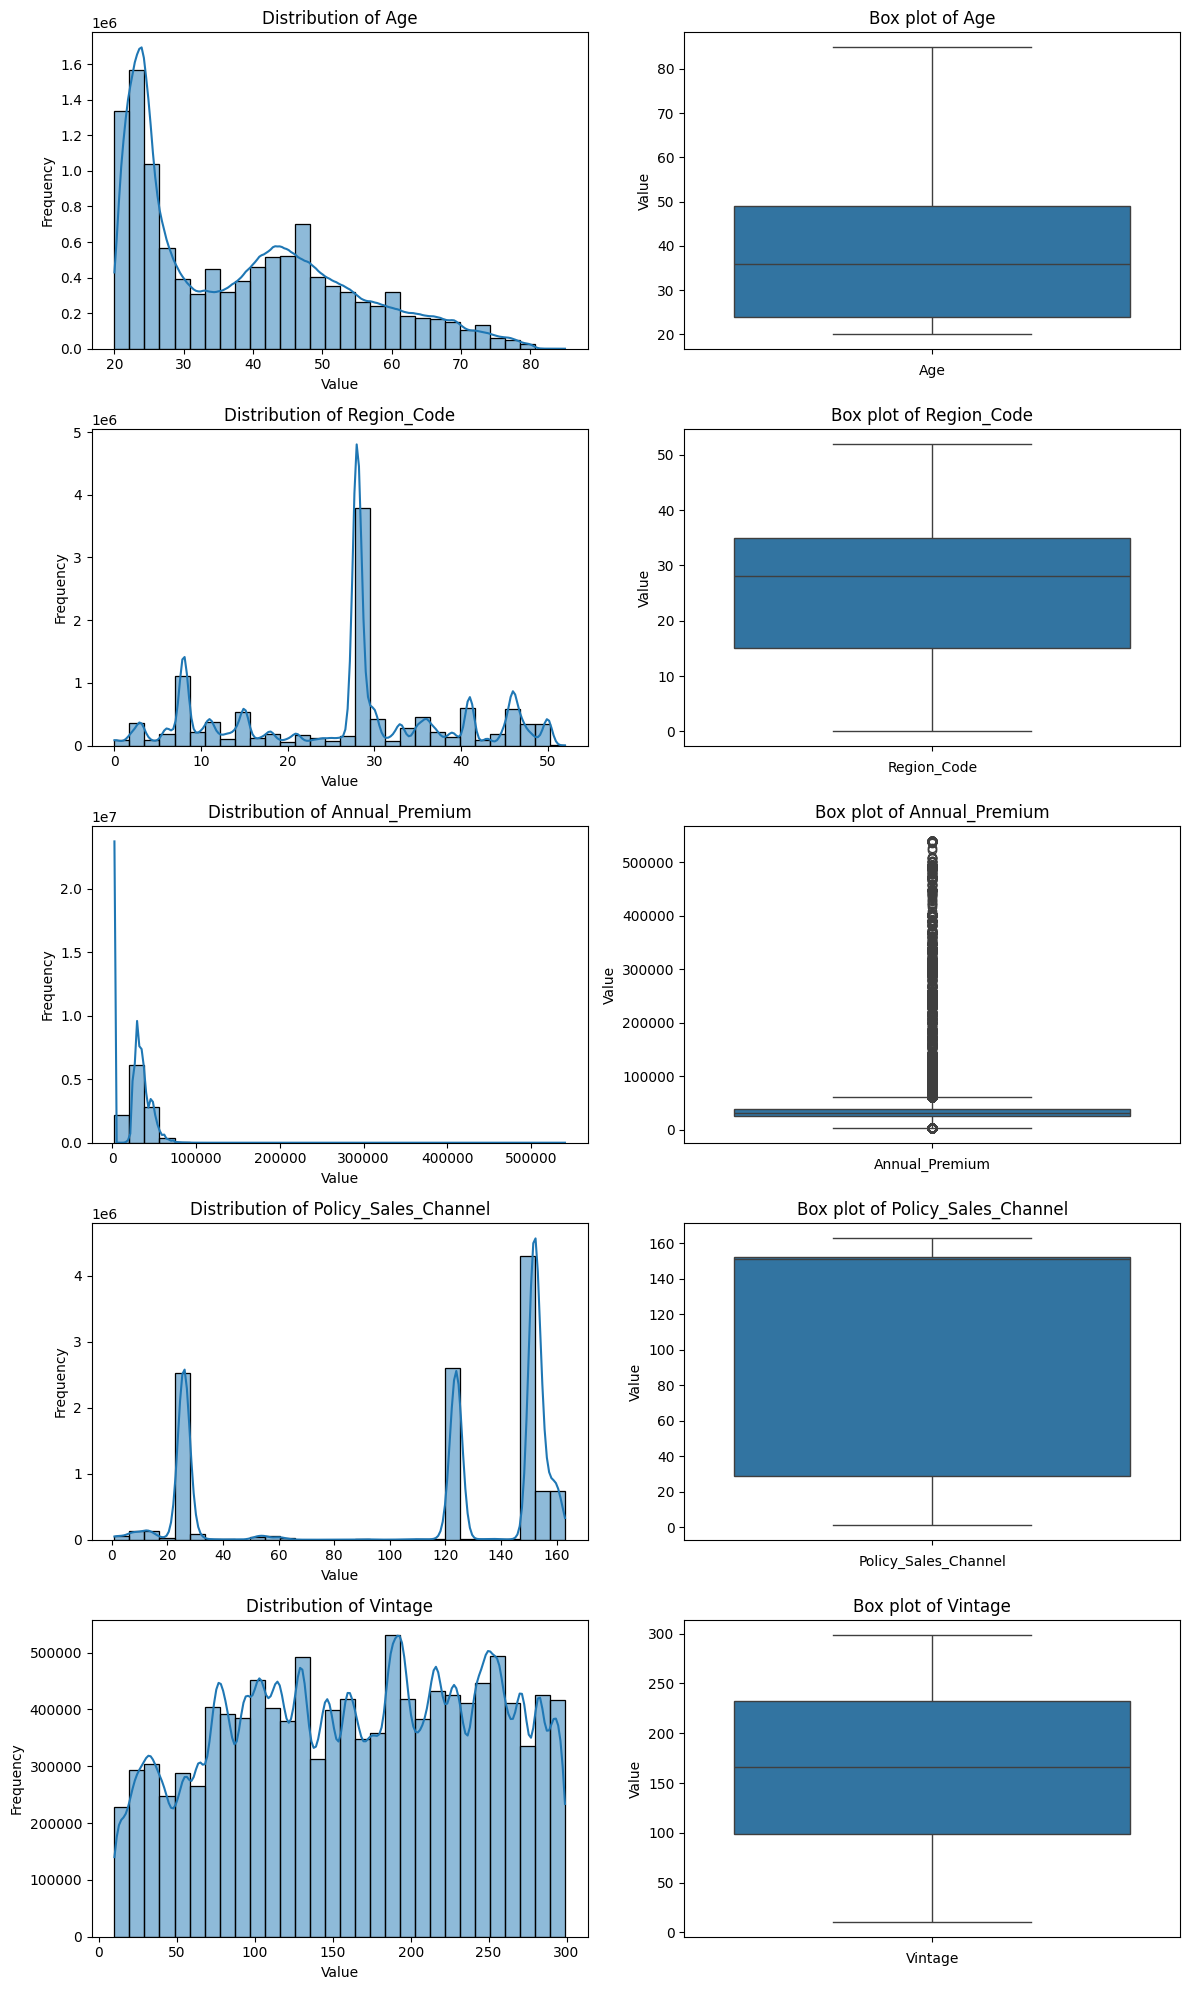

In [16]:
# Check basic statistics for numerical columns
numerical = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(numerical), 2, figsize=(12, 20))

# Plot the histograms and box plots
for i, column in enumerate(numerical):
    # Histogram
    sns.histplot(train[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(train[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

-> 'Annual_Premium' 칼럼 이상치 다수 존재

In [ ]:
# numerical column 정규화
# scaler = StandardScaler()
# train[numerical] = scaler.fit_transform(train[numerical])
# train.head()

-> Age를 범주형으로 바꾸고, 나머지를 scaler해야 할듯

In [14]:
# Age 최대, 최소값 확인
print("min :", train['Age'].min())
print("max :", train['Age'].max())

min : 20
max : 85


In [15]:
# Age 범주형 변경

# 구간 설정
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, float('inf')]

# 각 구간에 대한 라벨 설정
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Age 열을 범주형 변수로 변환
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

- 0 : 20-24
- 1 : 25-29
- 2 : 30-34
- 3 : 35-39
- 4 : 40-44
- 5 : 45-49
- 6 : 50-54
- 7 : 55-59
- 8 : 60-64
- 9 : 65-69
- 10 : 70-74
- 11 : 75-79
- 12 : 80세 이상

In [16]:
# Age 열 삭제
train = train.drop(['Age'], axis = 1)

In [17]:
train.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,1,35.0,0,1,1,65101.0,124.0,187,0,0
1,0,1,28.0,0,2,1,58911.0,26.0,288,1,4
2,1,1,14.0,1,0,0,38043.0,152.0,254,0,1
3,1,1,1.0,0,1,1,2630.0,156.0,76,0,3
4,1,1,15.0,1,1,0,31951.0,152.0,294,0,3


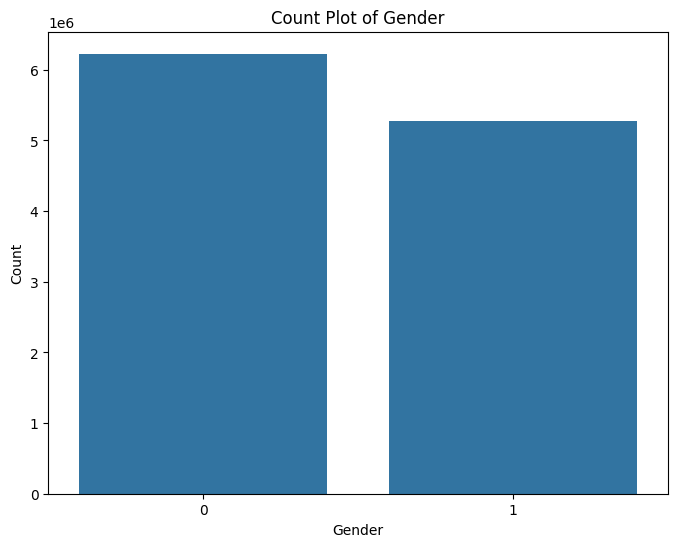

In [18]:
# count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=train)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

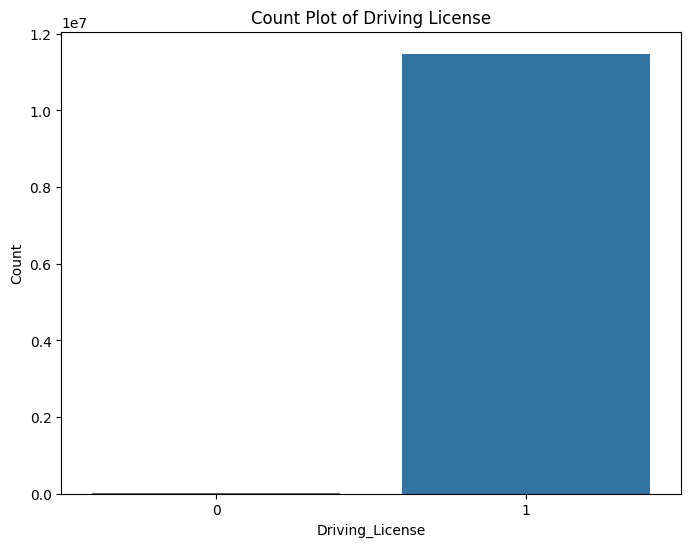

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Driving_License', data=train)
plt.title('Count Plot of Driving License')
plt.xlabel('Driving_License')
plt.ylabel('Count')
plt.show()

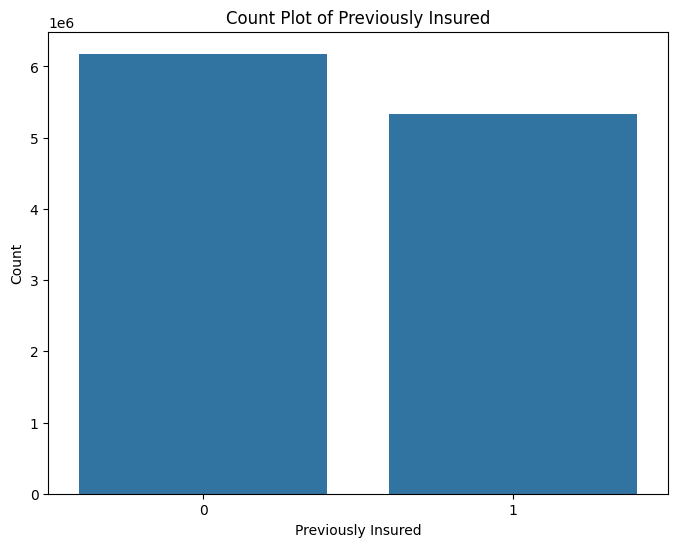

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Previously_Insured', data=train)
plt.title('Count Plot of Previously Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.show()

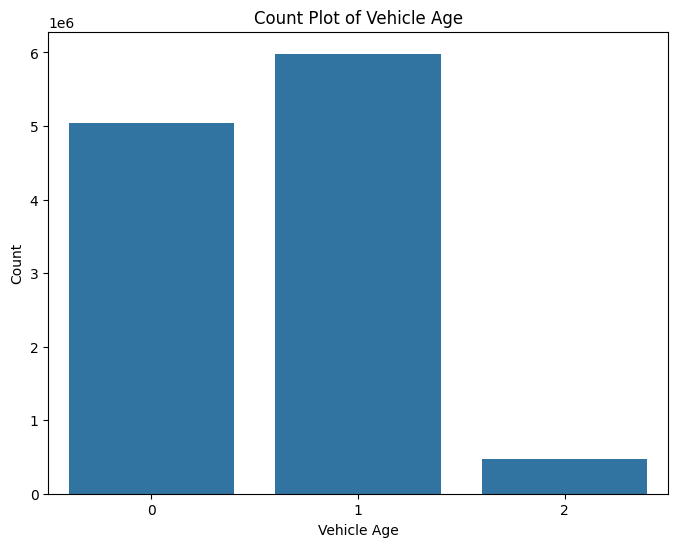

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', data=train)
plt.title('Count Plot of Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

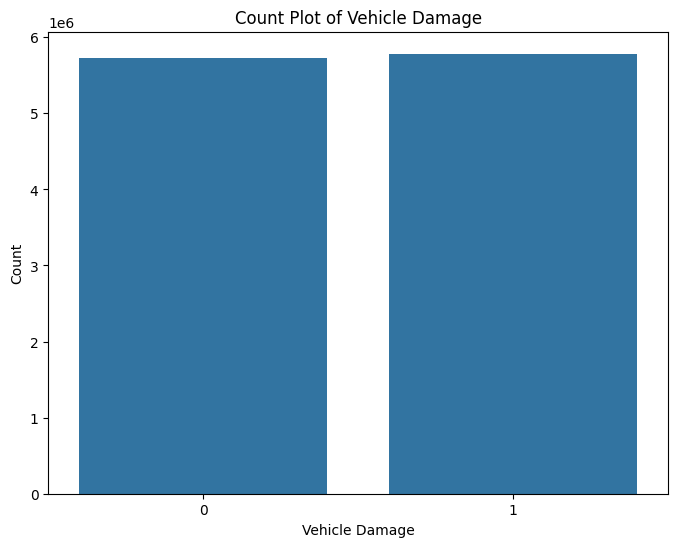

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Damage', data=train)
plt.title('Count Plot of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

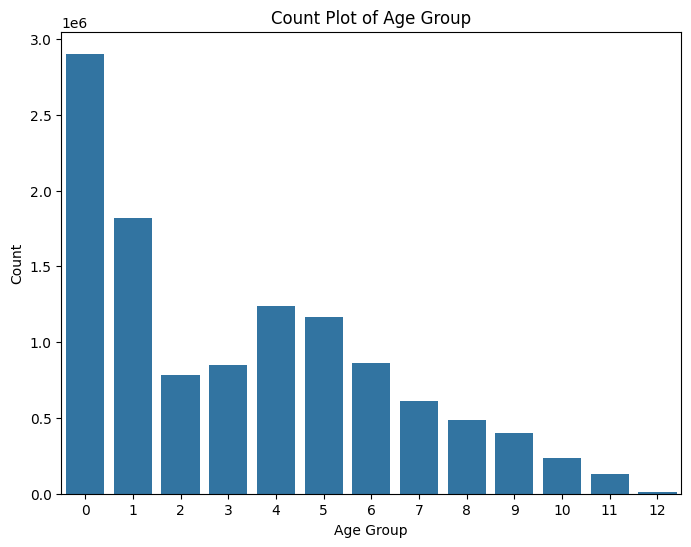

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', data=train)
plt.title('Count Plot of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

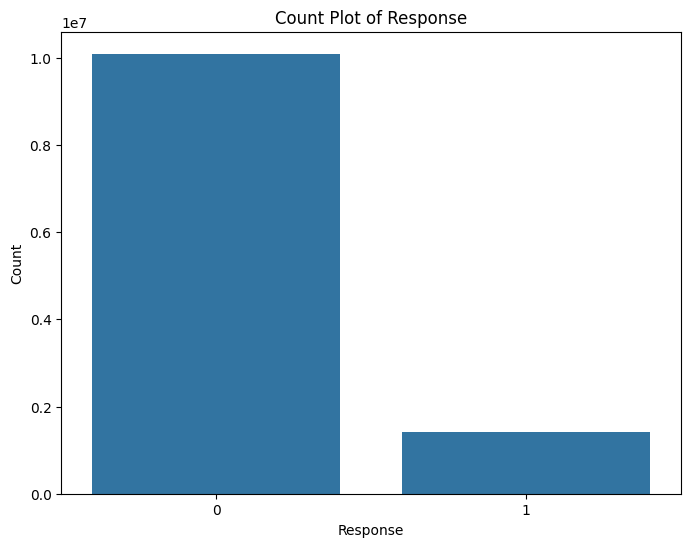

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Response', data=train)
plt.title('Count Plot of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [19]:
# numerical column 정규화
numerical = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
scaler = StandardScaler()
train[numerical] = scaler.fit_transform(train[numerical])
train.head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeGroup
0,0,1,0.660528,0,1,1,2.105145,0.214202,0.288852,0,0
1,0,1,0.121718,0,2,1,1.728962,-1.599414,1.551675,1,4
2,1,1,-0.955902,1,0,0,0.460756,0.732378,1.126566,0,1
3,1,1,-1.956550,0,1,1,-1.691389,0.806403,-1.099003,0,3
4,1,1,-0.878929,1,1,0,0.090529,0.732378,1.626694,0,3


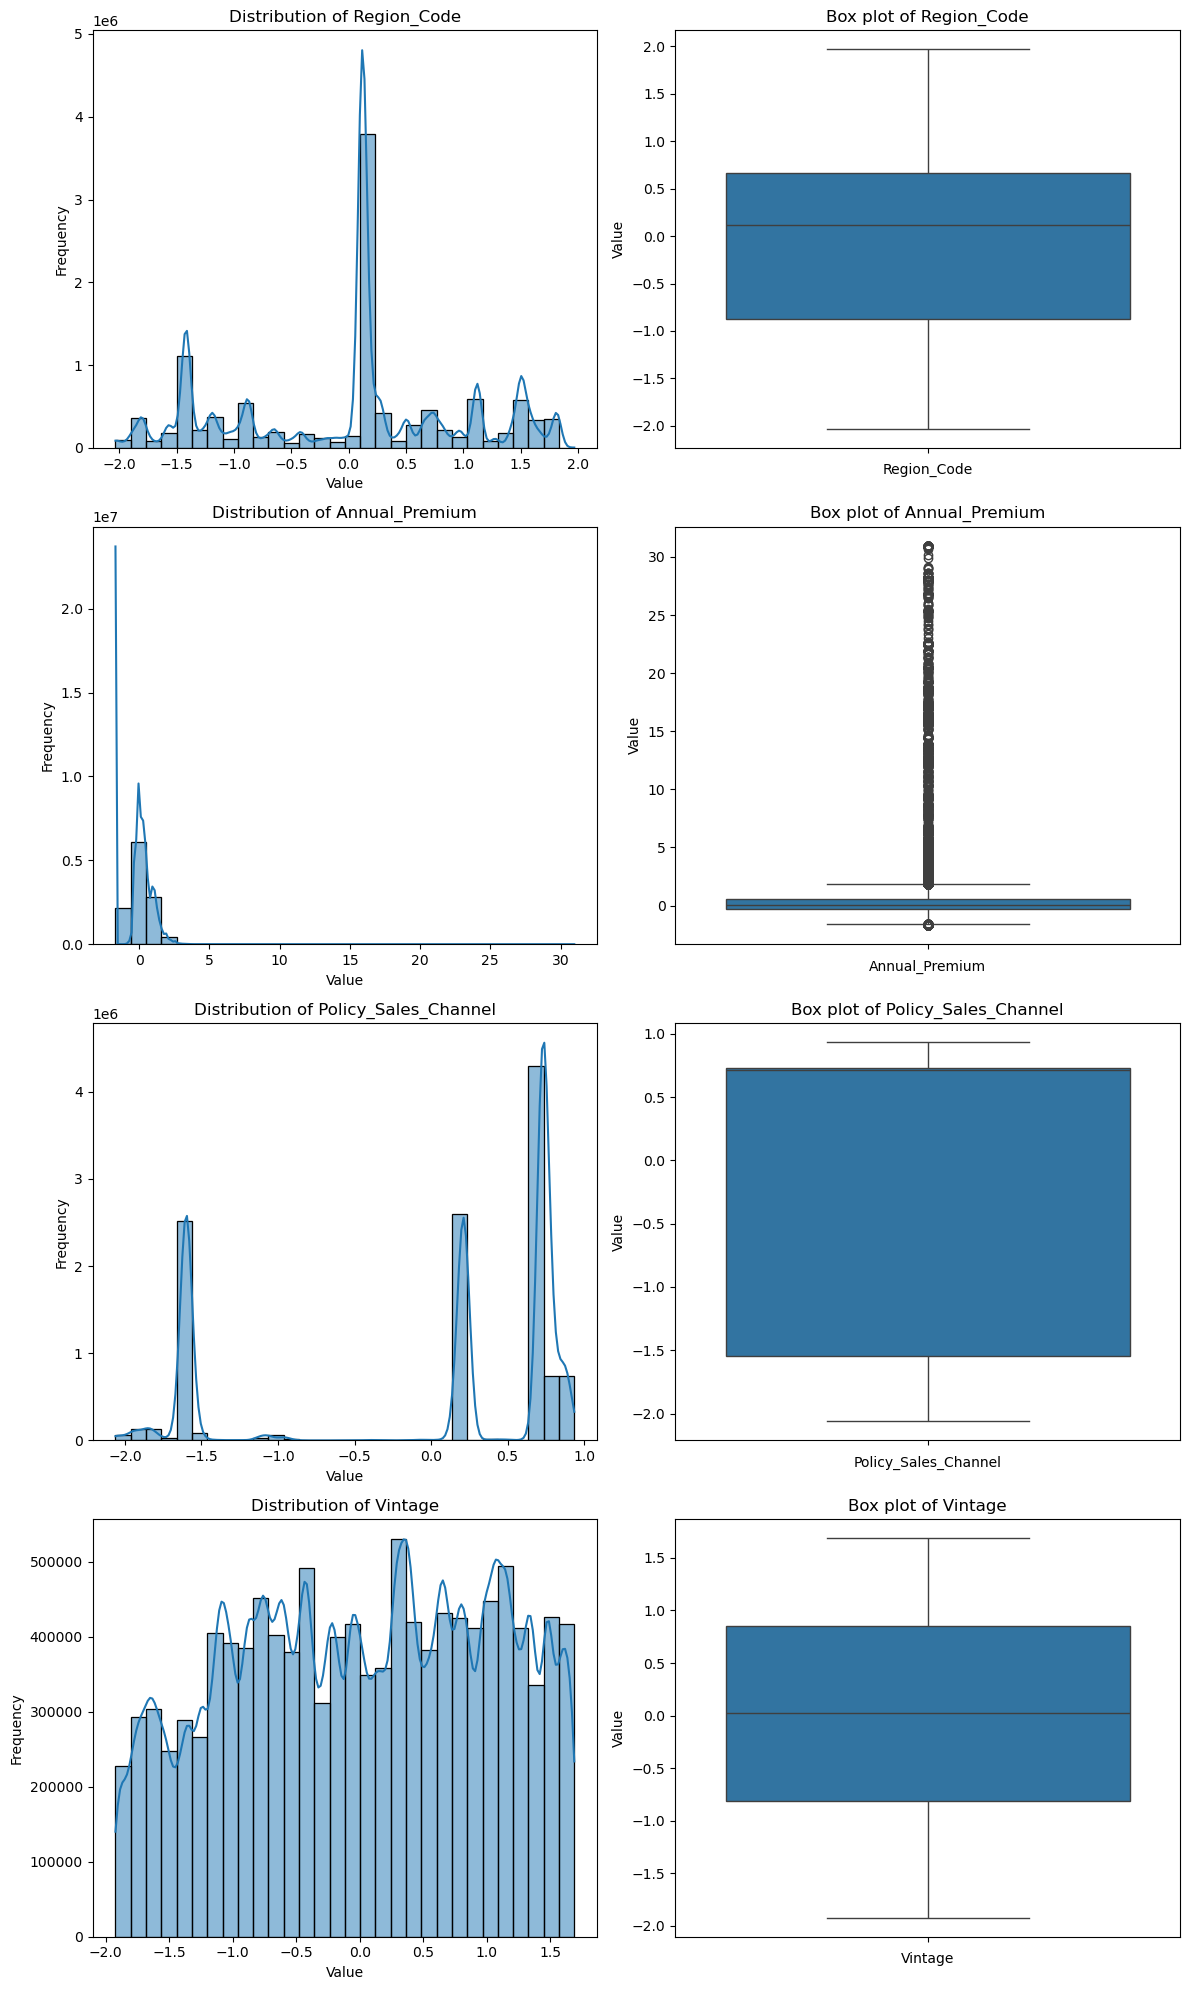

In [ ]:
# 정규화 이후 박스플랏 및 히스토그램
numerical = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Create subplots for histograms and box plots
fig, axes = plt.subplots(len(numerical), 2, figsize=(12, 20))

# Plot the histograms and box plots
for i, column in enumerate(numerical):
    # Histogram
    sns.histplot(train[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(train[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

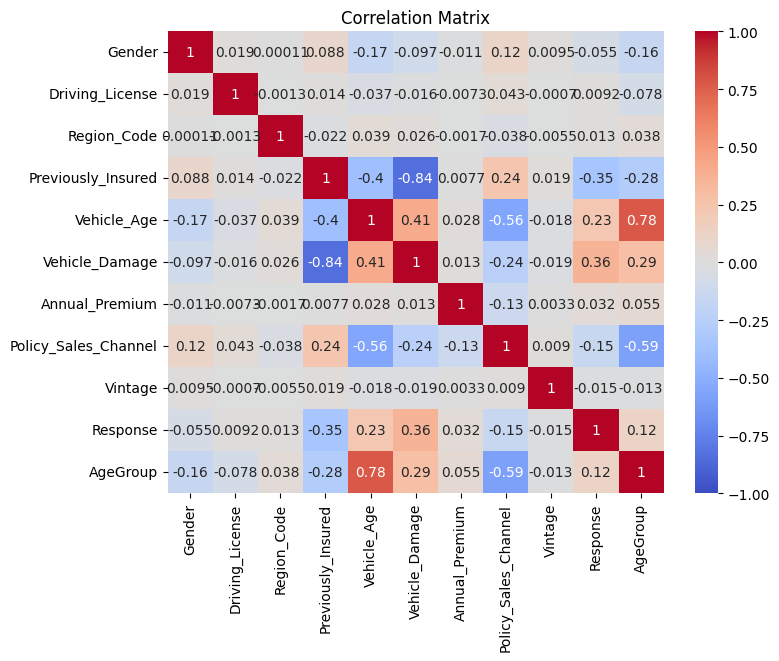

In [20]:
# 상관계수 확인
correlation_matrix = train.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

[ 약한 양의 상관관계 ] - 0.2 이상, 0.4 미만
1. (Policy_Sales_Channel, Previously_Insured) : 0.24
2. (Response, Vehicle_Age) : 0.23
3. (AgeGroup, Vehicle_Damage) : 0.29
4. (Response, Vehicle_Damage) : 0.36

[ 약한 음의 상관관계 ]
1. (AgeGroup, Previously_Insured) : -0.28
2. (Response, Previously_Insured) : -0.35
3. (Policy_Sales_Channel, Vehicle_Damage) : -0.24

[ 강한 양의 상관관계 ]
1. (Vehicle_Damage, Vehicle_Age) : 0.41
2. (AgeGroup, Vehicle_Age): 0.78

[ 강한 음의 상관관계 ]
1. (Vehicle_Age, Previously_Insured) : -0.4
2. (Vehicle_Damage, Previously_Insured) : -0.84
3. (Policy_Sales_Channel, Vehicle_Age) : -0.56
4. (AgeGroup, Policy_Sales_Channel) : -0.59

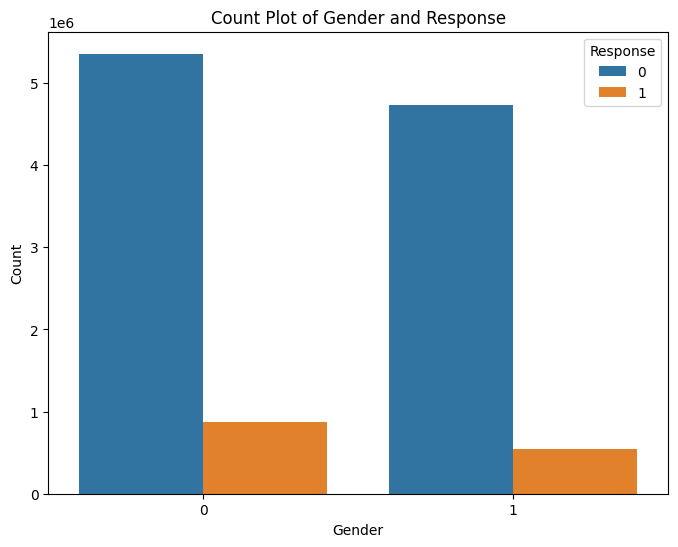

In [21]:
# 각 칼럼 범주 별 response 분포

# Gender - Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Response', data=train)
plt.title('Count Plot of Gender and Response')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

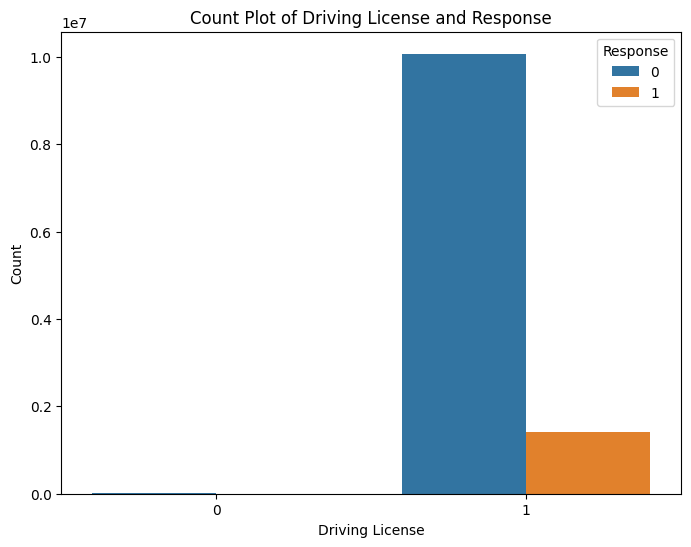

In [23]:
# Driving_License - Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Driving_License', hue='Response', data=train)
plt.title('Count Plot of Driving License and Response')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.show()

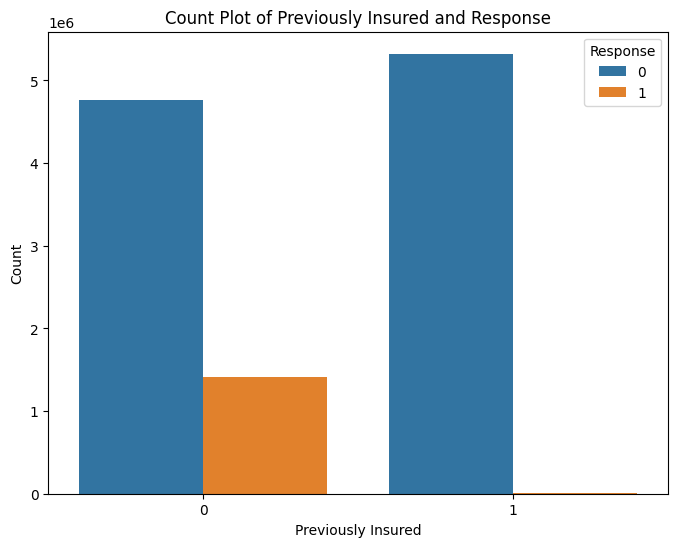

In [24]:
# Previously_Insured - Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Previously_Insured', hue='Response', data=train)
plt.title('Count Plot of Previously Insured and Response')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.show()

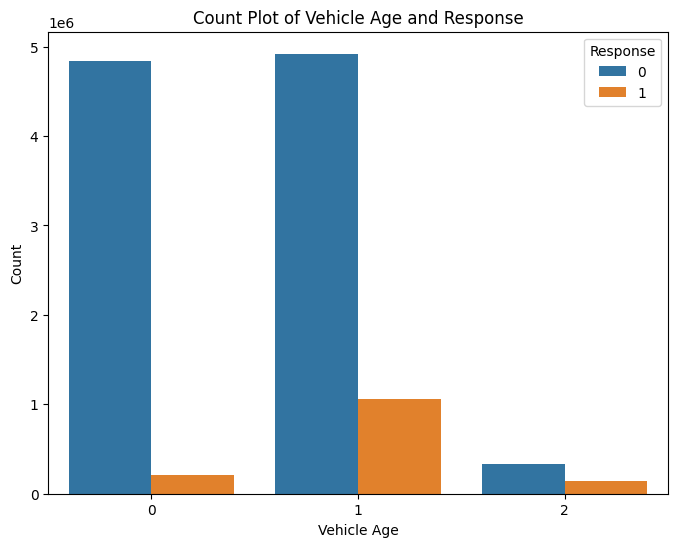

In [25]:
# Vehicle_Age - Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=train)
plt.title('Count Plot of Vehicle Age and Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

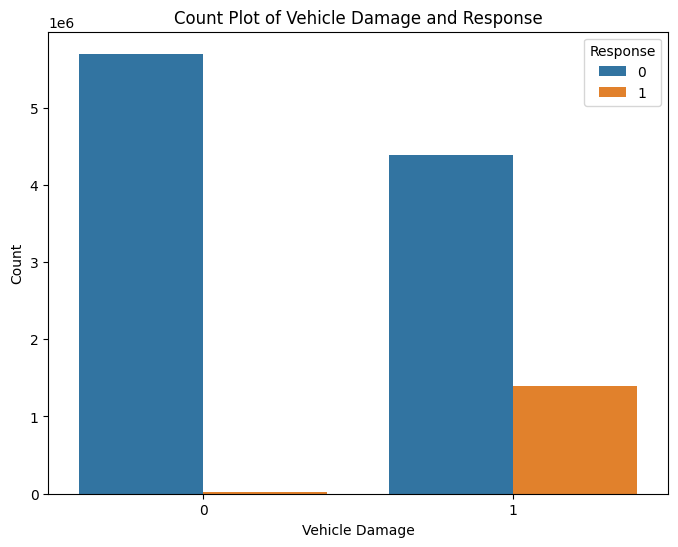

In [26]:
# Vehicle_Damage - Response
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Damage', hue='Response', data=train)
plt.title('Count Plot of Vehicle Damage and Response')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

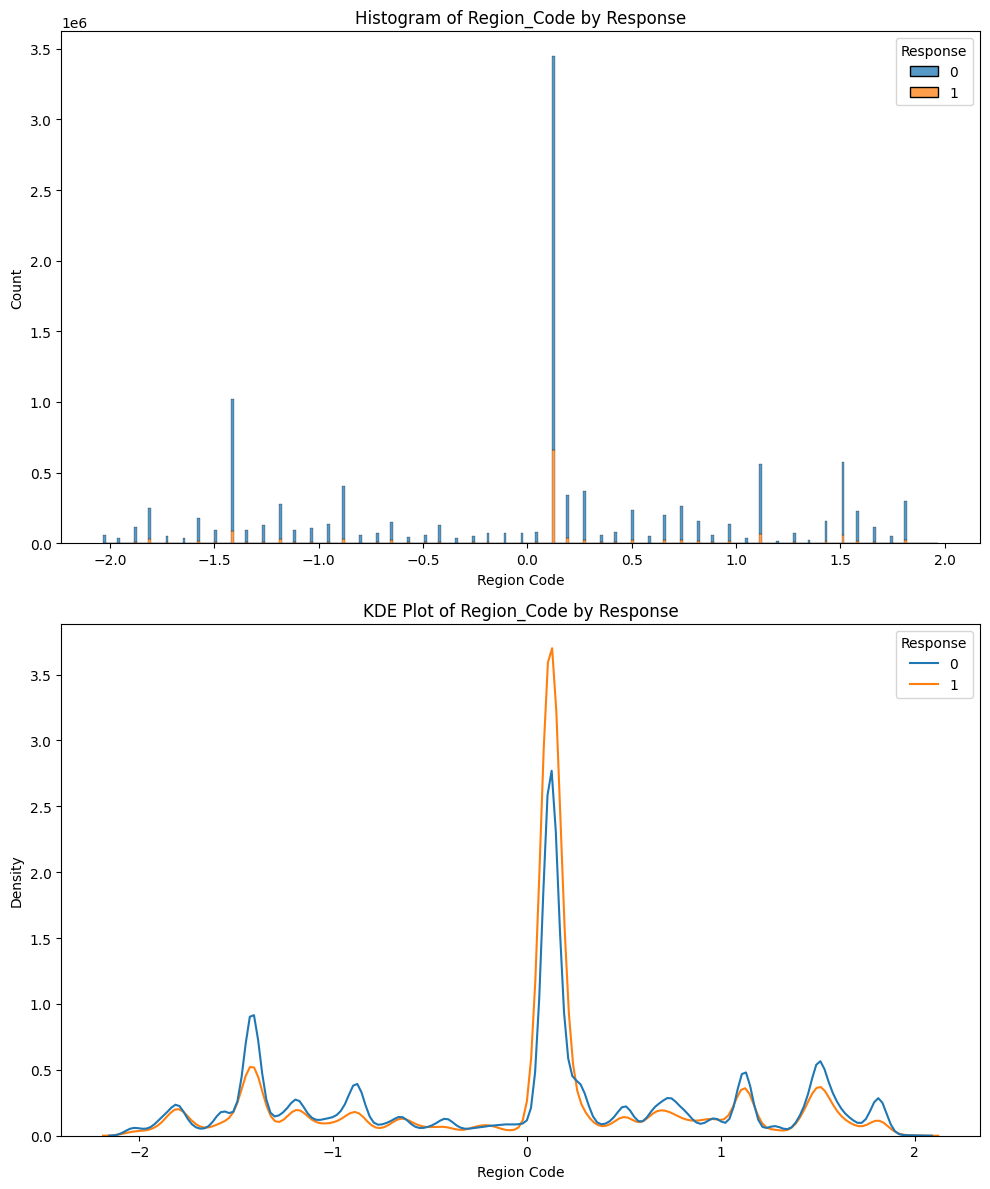

In [32]:
# 서브플롯
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# histplot
sns.histplot(data=train, x='Region_Code', hue='Response', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title('Histogram of Region_Code by Response')
axes[0].set_xlabel('Region Code')
axes[0].set_ylabel('Count')

# kdeplot
sns.kdeplot(data=train, x='Region_Code', hue='Response', common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Region_Code by Response')
axes[1].set_xlabel('Region Code')
axes[1].set_ylabel('Density')

# 간격 조정
plt.tight_layout()
plt.show()

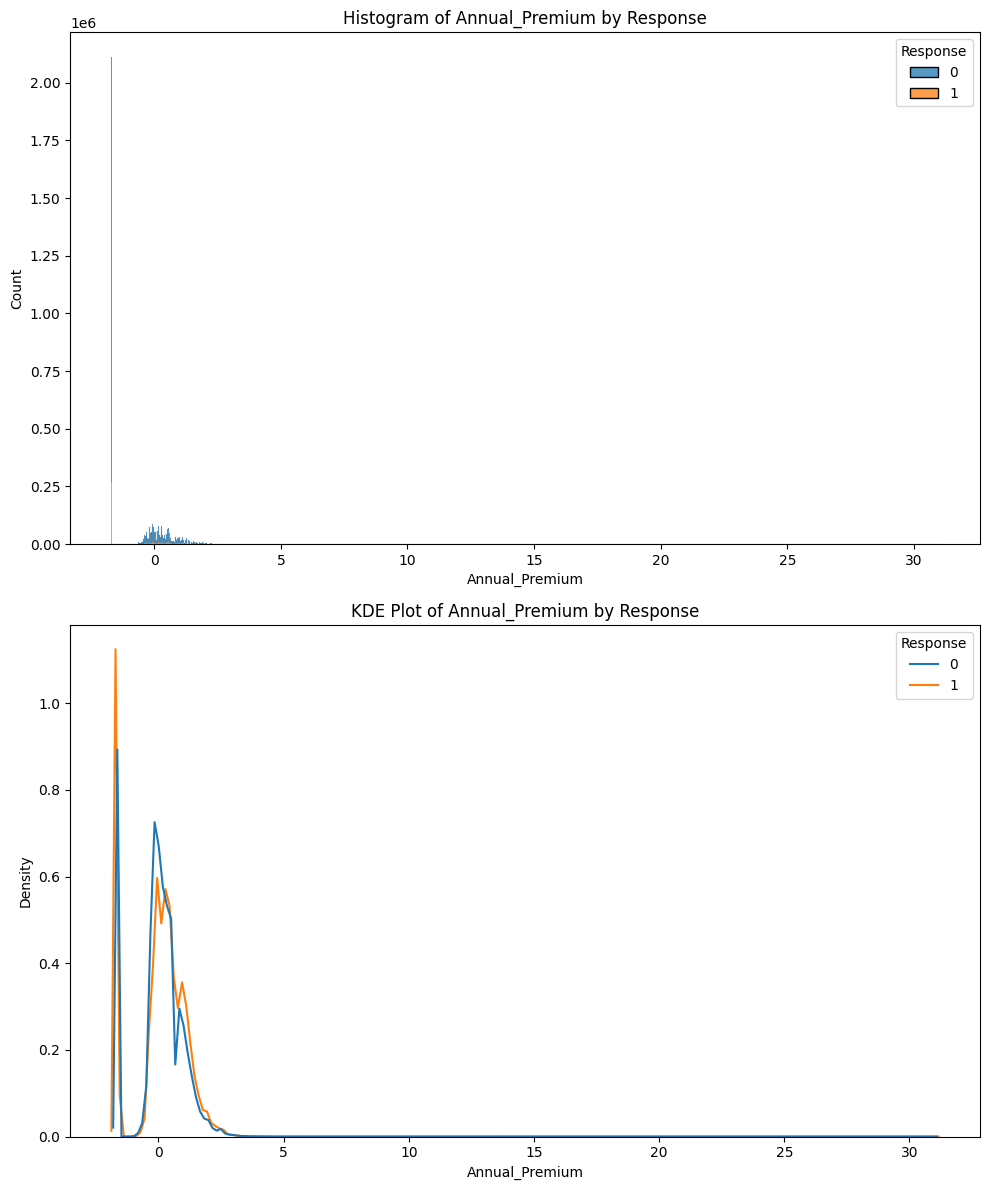

In [33]:
# 서브플롯
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# histplot
sns.histplot(data=train, x='Annual_Premium', hue='Response', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title('Histogram of Annual_Premium by Response')
axes[0].set_xlabel('Annual_Premium')
axes[0].set_ylabel('Count')

# kdeplot
sns.kdeplot(data=train, x='Annual_Premium', hue='Response', common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Annual_Premium by Response')
axes[1].set_xlabel('Annual_Premium')
axes[1].set_ylabel('Density')

# 간격 조정
plt.tight_layout()
plt.show()

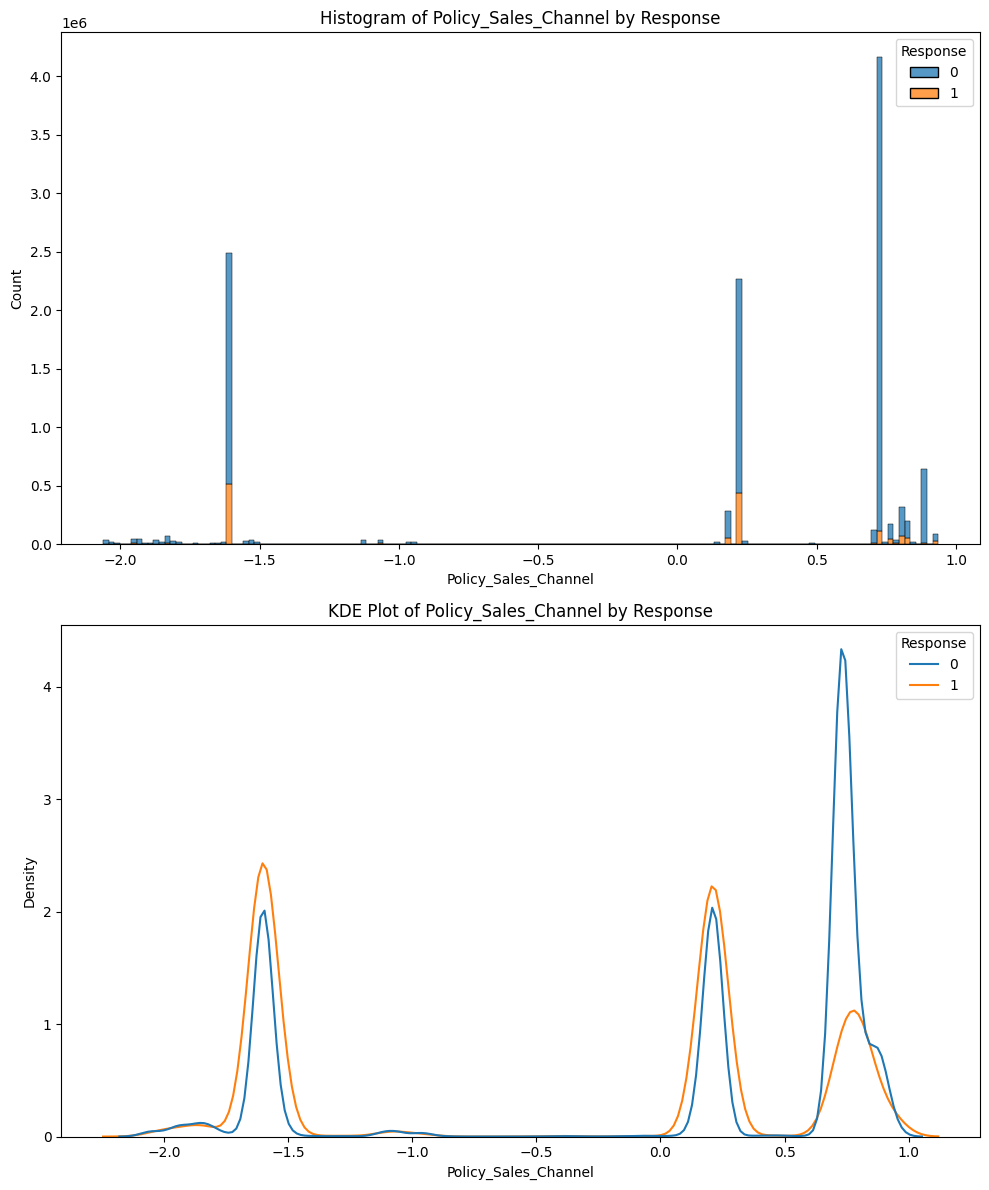

In [34]:
# 서브플롯
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# histplot
sns.histplot(data=train, x='Policy_Sales_Channel', hue='Response', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title('Histogram of Policy_Sales_Channel by Response')
axes[0].set_xlabel('Policy_Sales_Channel')
axes[0].set_ylabel('Count')

# kdeplot
sns.kdeplot(data=train, x='Policy_Sales_Channel', hue='Response', common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Policy_Sales_Channel by Response')
axes[1].set_xlabel('Policy_Sales_Channel')
axes[1].set_ylabel('Density')

# 간격 조정
plt.tight_layout()
plt.show()

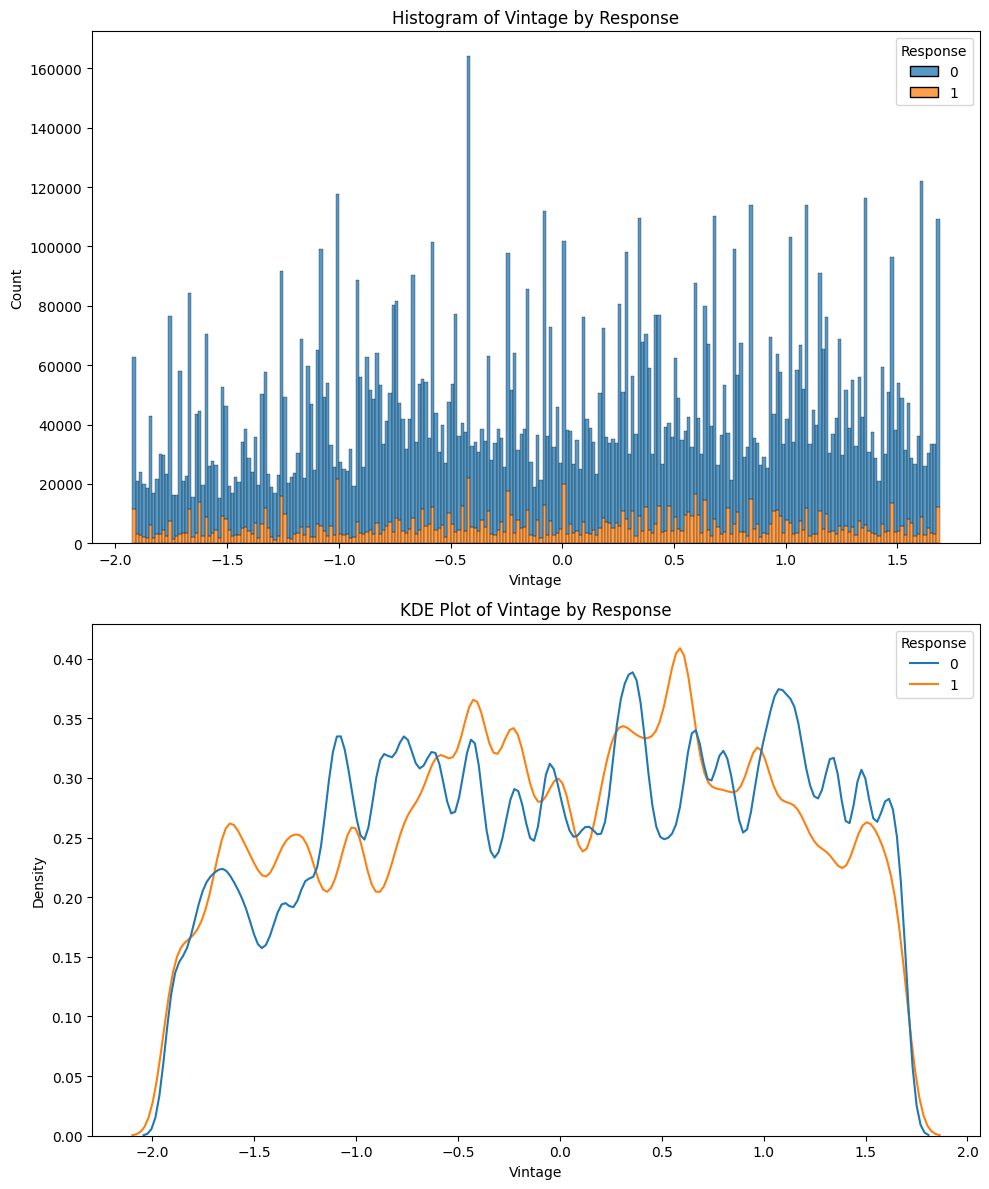

In [35]:
# 서브플롯
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# histplot
sns.histplot(data=train, x='Vintage', hue='Response', multiple='stack', kde=False, ax=axes[0])
axes[0].set_title('Histogram of Vintage by Response')
axes[0].set_xlabel('Vintage')
axes[0].set_ylabel('Count')

# kdeplot
sns.kdeplot(data=train, x='Vintage', hue='Response', common_norm=False, ax=axes[1])
axes[1].set_title('KDE Plot of Vintage by Response')
axes[1].set_xlabel('Vintage')
axes[1].set_ylabel('Density')

# 간격 조정
plt.tight_layout()
plt.show()

### pycaret

In [ ]:
# !pip install pycaret

In [37]:
# !pip install pycaret[full]

In [38]:
test.reset_index(inplace = True)

In [40]:
!pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached dash-2.17.1-py3-none-any.whl.metadata (10 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
Using cached sktime-0.26.0-py3-none-any.whl (21.8 MB)
Using cached category_

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'c:\\users\\hyeonseo2\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [41]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
import os

def seed_everything(seed) :
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
clf = setup(data = train, target = 'Response', normalize = True,
           session_id = 42, use_gpu = True)

In [ ]:
top3 = compare_models(sort = 'f1', n_select = 5, fold = 5)

In [ ]:
result = pull()
display(result)